<a href="https://colab.research.google.com/github/MimmoDG/NBA-Project---Programming/blob/main/Project_VR481299_Di_Grazia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# LeBron James analysis:


*   Record breaker
*   Career trends

His datasets are automatically updated using html



## Per Game LeBron

In [2]:
data = pd.read_html('https://www.basketball-reference.com/players/j/jamesle01.html')

In [3]:
LeBron_Career_PerGame_RS = pd.DataFrame(data[0])

In [4]:
for el in LeBron_Career_PerGame_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_PerGame_RS[el] = pd.to_numeric(LeBron_Career_PerGame_RS[el])

In [5]:
LeBron_Career_PerGame_RS 

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,39.5,7.9,18.9,...,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,1.9,20.9
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,42.4,9.9,21.1,...,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,1.8,27.2
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,42.5,11.1,23.1,...,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,2.3,31.4
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,40.9,9.9,20.8,...,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,2.2,27.3
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,40.4,10.6,21.9,...,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,2.2,30.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,37.7,9.7,19.9,...,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7,28.4
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,39.0,10.1,20.1,...,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,1.6,29.7
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,38.8,9.6,18.8,...,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,2.1,26.7
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,37.5,10.0,18.9,...,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,1.5,27.1
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,37.9,10.1,17.8,...,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,1.4,26.8


In [6]:
LeB_C_PG_RS1 = LeBron_Career_PerGame_RS.drop(labels=range(19, 24), axis=0)

In [7]:
LeB_C_PG_RS = LeB_C_PG_RS1.drop(labels=['Lg', 'eFG%', 'GS', 'PF'], axis=1)

In [8]:
LeB_C_PG_RS

,Season,Age,Tm,Pos,G,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
0,2003-04,19.0,CLE,SG,79.0,39.5,7.9,18.9,0.417,0.8,...,5.8,0.754,1.3,4.2,5.5,5.9,1.6,0.7,3.5,20.9
1,2004-05,20.0,CLE,SF,80.0,42.4,9.9,21.1,0.472,1.4,...,8.0,0.750,1.4,6.0,7.4,7.2,2.2,0.7,3.3,27.2
2,2005-06,21.0,CLE,SF,79.0,42.5,11.1,23.1,0.480,1.6,...,10.3,0.738,0.9,6.1,7.0,6.6,1.6,0.8,3.3,31.4
3,2006-07,22.0,CLE,SF,78.0,40.9,9.9,20.8,0.476,1.3,...,9.0,0.698,1.1,5.7,6.7,6.0,1.6,0.7,3.2,27.3
4,2007-08,23.0,CLE,SF,75.0,40.4,10.6,21.9,0.484,1.5,...,10.3,0.712,1.8,6.1,7.9,7.2,1.8,1.1,3.4,30.0
5,2008-09,24.0,CLE,SF,81.0,37.7,9.7,19.9,0.489,1.6,...,9.4,0.780,1.3,6.3,7.6,7.2,1.7,1.1,3.0,28.4
6,2009-10,25.0,CLE,SF,76.0,39.0,10.1,20.1,0.503,1.7,...,10.2,0.767,0.9,6.4,7.3,8.6,1.6,1.0,3.4,29.7
7,2010-11,26.0,MIA,SF,79.0,38.8,9.6,18.8,0.510,1.2,...,8.4,0.759,1.0,6.5,7.5,7.0,1.6,0.6,3.6,26.7
8,2011-12,27.0,MIA,SF,62.0,37.5,10.0,18.9,0.531,0.9,...,8.1,0.771,1.5,6.4,7.9,6.2,1.9,0.8,3.4,27.1
9,2012-13,28.0,MIA,PF,76.0,37.9,10.1,17.8,0.565,1.4,...,7.0,0.753,1.3,6.8,8.0,7.3,1.7,0.9,3.0,26.8


In [9]:
LeB_C_PG_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  19 non-null     object 
 1   Age     19 non-null     float64
 2   Tm      19 non-null     object 
 3   Pos     19 non-null     object 
 4   G       19 non-null     float64
 5   MP      19 non-null     float64
 6   FG      19 non-null     float64
 7   FGA     19 non-null     float64
 8   FG%     19 non-null     float64
 9   3P      19 non-null     float64
 10  3PA     19 non-null     float64
 11  3P%     19 non-null     float64
 12  2P      19 non-null     float64
 13  2PA     19 non-null     float64
 14  2P%     19 non-null     float64
 15  FT      19 non-null     float64
 16  FTA     19 non-null     float64
 17  FT%     19 non-null     float64
 18  ORB     19 non-null     float64
 19  DRB     19 non-null     float64
 20  TRB     19 non-null     float64
 21  AST     19 non-null     float64
 22  STL 

In [10]:
LeB_C_PG_RS.describe()

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,28.000000,71.105263,37.931579,9.900000,19.594737,0.506842,1.605263,4.621053,0.345368,8.305263,...,7.715789,0.730632,1.157895,6.347368,7.484211,7.384211,1.563158,0.747368,3.500000,27.047368
std,5.627314,12.045722,2.479259,0.705534,1.473271,0.036005,0.485883,1.339809,0.026837,0.669555,...,1.576657,0.033483,0.291196,0.789070,0.811215,1.149523,0.260791,0.211787,0.338296,2.271898
min,19.000000,41.000000,33.400000,7.900000,17.600000,0.417000,0.800000,2.400000,0.290000,7.100000,...,5.600000,0.665000,0.600000,4.200000,5.500000,5.900000,1.100000,0.300000,3.000000,20.900000
25%,23.500000,68.000000,36.450000,9.650000,18.550000,0.486000,1.350000,3.800000,0.331500,8.100000,...,6.500000,0.704000,1.000000,6.000000,7.150000,6.550000,1.400000,0.600000,3.300000,25.850000
50%,28.000000,76.000000,37.700000,9.900000,19.300000,0.510000,1.600000,4.700000,0.348000,8.400000,...,7.600000,0.738000,1.100000,6.400000,7.600000,7.200000,1.600000,0.700000,3.400000,27.100000
75%,32.500000,79.000000,39.250000,10.100000,20.450000,0.526500,1.750000,5.050000,0.362500,8.600000,...,8.700000,0.753500,1.300000,6.850000,7.900000,8.050000,1.650000,0.900000,3.650000,27.950000
max,37.000000,82.000000,42.500000,11.100000,23.100000,0.567000,2.800000,7.900000,0.406000,9.500000,...,10.300000,0.780000,1.800000,7.500000,8.600000,10.200000,2.200000,1.100000,4.200000,31.400000


In [11]:
a = LeB_C_PG_RS['PTS'].head(7).mean() #media punti ai cavs (prima esperienza)
b = LeB_C_PG_RS['PTS'].iloc[7:11].mean() #media punti agli heat
c = LeB_C_PG_RS['PTS'].iloc[11:15].mean() #media punti ai cavs (seconda esperienza)
d = LeB_C_PG_RS['PTS'].tail(4).mean() #media punti ai lakers
PTS_Mean_different_teams = [a, b, c, d]
PTS_Mean_different_teams

[27.842857142857145, 26.924999999999997, 26.125, 26.700000000000003]

In [12]:
LeB_C_PG_RS.corr()

,Age,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PTS
Age,1.000000,-0.690090,-0.869277,0.174912,-0.396703,0.585959,0.717249,0.653593,0.448425,-0.336182,...,-0.636184,-0.453770,-0.349203,0.676874,0.537914,0.517017,-0.692764,-0.247060,0.464009,-0.097339
G,-0.690090,1.000000,0.597769,-0.136623,0.029460,-0.165074,-0.682584,-0.655564,-0.202912,0.331252,...,0.465309,0.315393,0.356112,-0.358848,-0.261916,-0.062864,0.355001,0.045846,-0.053169,0.028431
MP,-0.869277,0.597769,1.000000,0.221371,0.611329,-0.395825,-0.463636,-0.423350,-0.292253,0.583897,...,0.650226,0.348216,0.345150,-0.428483,-0.301933,-0.446409,0.701320,0.287957,-0.399416,0.393162
FG,0.174912,-0.136623,0.221371,1.000000,0.555854,0.453144,0.413255,0.395532,0.309837,0.759724,...,0.368078,0.001646,0.129797,0.575798,0.599877,0.091790,0.120775,0.364365,-0.186210,0.900451
FGA,-0.396703,0.029460,0.611329,0.555854,1.000000,-0.487232,0.177766,0.296427,-0.411640,0.468044,...,0.542237,0.021469,0.128952,-0.066678,-0.004257,-0.134220,0.355171,0.497607,-0.332173,0.664165
FG%,0.585959,-0.165074,-0.395825,0.453144,-0.487232,1.000000,0.229650,0.079767,0.779800,0.307688,...,-0.175328,-0.026640,0.008869,0.665916,0.629497,0.222757,-0.229626,-0.163619,0.148691,0.239434
3P,0.717249,-0.682584,-0.463636,0.413255,0.177766,0.229650,1.000000,0.974405,0.336419,-0.275028,...,-0.304699,-0.382334,-0.489164,0.581828,0.410382,0.491523,-0.463125,0.089222,0.223071,0.290656
3PA,0.653593,-0.655564,-0.423350,0.395532,0.296427,0.079767,0.974405,1.000000,0.127703,-0.276956,...,-0.233180,-0.411209,-0.457542,0.494021,0.338704,0.466996,-0.471472,0.129426,0.203468,0.308650
3P%,0.448425,-0.202912,-0.292253,0.309837,-0.411640,0.779800,0.336419,0.127703,1.000000,0.085218,...,-0.219934,0.032123,-0.197664,0.552939,0.456038,0.262758,-0.038435,-0.087300,0.115040,0.158150
2P,-0.336182,0.331252,0.583897,0.759724,0.468044,0.307688,-0.275028,-0.276956,0.085218,1.000000,...,0.603016,0.274165,0.499847,0.183521,0.337697,-0.270565,0.478416,0.315485,-0.372810,0.741950


In [13]:
A = LeB_C_PG_RS.corr().min()
C = LeB_C_PG_RS.corr().max()
B = LeB_C_PG_RS.corr().mean()
[A, B, C]

[Age   -0.869960
 G     -0.690090
 MP    -0.869277
 FG    -0.186210
 FGA   -0.487232
 FG%   -0.488535
 3P    -0.682584
 3PA   -0.655564
 3P%   -0.460173
 2P    -0.372810
 2PA   -0.869960
 2P%   -0.686939
 FT    -0.681486
 FTA   -0.636184
 FT%   -0.538522
 ORB   -0.489164
 DRB   -0.449397
 TRB   -0.301933
 AST   -0.535765
 STL   -0.692764
 BLK   -0.395458
 TOV   -0.566736
 PTS   -0.306484
 dtype: float64,
 Age    0.011460
 G      0.037965
 MP     0.117107
 FG     0.353372
 FGA    0.186307
 FG%    0.172708
 3P     0.107018
 3PA    0.093601
 3P%    0.141508
 2P     0.295722
 2PA    0.092314
 2P%    0.161057
 FT     0.197603
 FTA    0.200398
 FT%    0.058686
 ORB    0.100051
 DRB    0.230894
 TRB    0.257841
 AST    0.093431
 STL    0.103507
 BLK    0.204154
 TOV   -0.051341
 PTS    0.352936
 dtype: float64,
 Age    1.0
 G      1.0
 MP     1.0
 FG     1.0
 FGA    1.0
 FG%    1.0
 3P     1.0
 3PA    1.0
 3P%    1.0
 2P     1.0
 2PA    1.0
 2P%    1.0
 FT     1.0
 FTA    1.0
 FT%    1.0
 ORB

<AxesSubplot:>

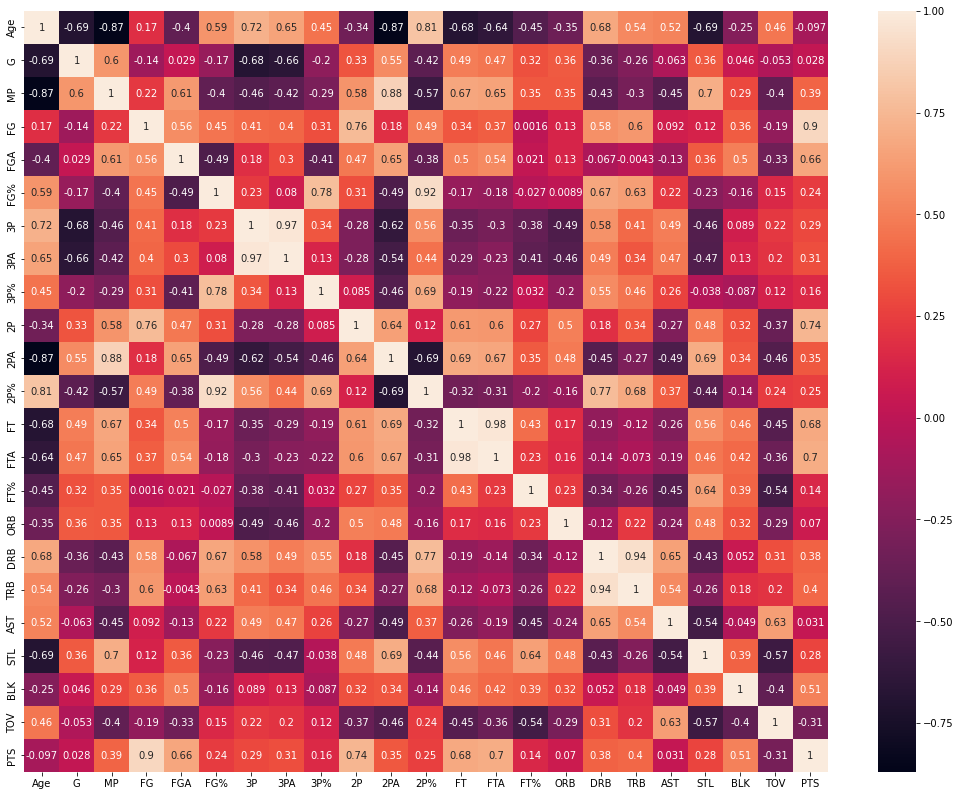

In [14]:
plt.figure(figsize=(18, 14))
sb.heatmap(LeB_C_PG_RS.corr(), annot=True)

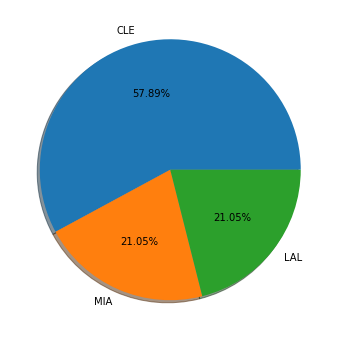

In [15]:
Team = list(LeB_C_PG_RS['Tm'])
CLE = Team.count('CLE')
MIA = Team.count('MIA')
LAL = Team.count('LAL')

Teams = ['CLE', 'MIA', 'LAL']
count = [CLE, MIA, LAL]
plt.figure(figsize=(10,6))
plt.pie(count, labels=Teams, autopct='%.2f%%', shadow=True)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'FG'}>,
        <AxesSubplot:title={'center':'FGA'}>],
       [<AxesSubplot:title={'center':'FG%'}>,
        <AxesSubplot:title={'center':'3P'}>,
        <AxesSubplot:title={'center':'3PA'}>,
        <AxesSubplot:title={'center':'3P%'}>,
        <AxesSubplot:title={'center':'2P'}>],
       [<AxesSubplot:title={'center':'2PA'}>,
        <AxesSubplot:title={'center':'2P%'}>,
        <AxesSubplot:title={'center':'FT'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT%'}>],
       [<AxesSubplot:title={'center':'ORB'}>,
        <AxesSubplot:title={'center':'DRB'}>,
        <AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':

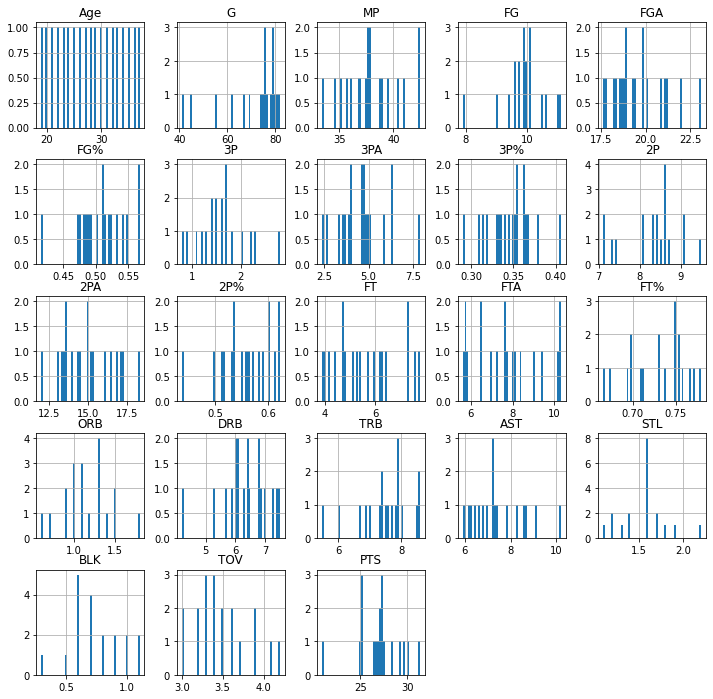

In [16]:
LeB_C_PG_RS.hist(bins=50, figsize=(12,12))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

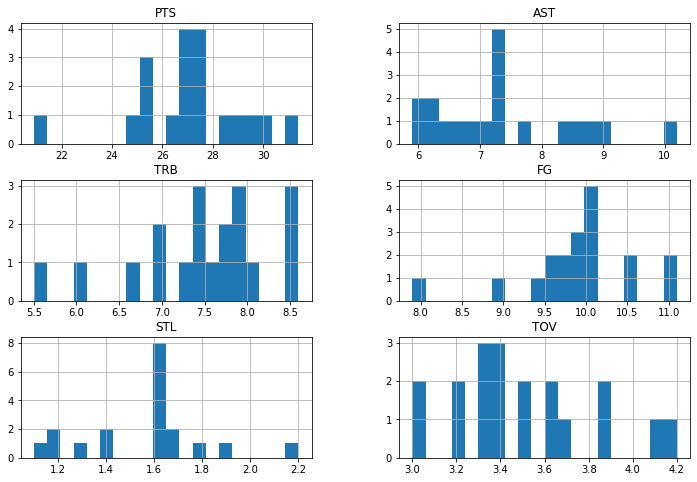

In [17]:
LeB_C_PG_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [18]:
#mean games played, mean minutes played

#potrebbe non significare un cazzo
LeB_C_PG_RS['G'].mean() * LeB_C_PG_RS['MP'].mean()

2697.134903047091

In [19]:
#mean shoots
LeB_C_PG_RS['FG'].mean() / LeB_C_PG_RS['FGA'].mean()

0.5052377115229655

In [20]:
LeB_C_PG_RS['FG%'].mean()

0.506842105263158

In [21]:
#trovo le diverse squadre in cui ha giocato
LeB_C_PG_RS['Tm'].value_counts()

CLE    11
MIA     4
LAL     4
Name: Tm, dtype: int64

In [22]:
a1 = LeB_C_PG_RS['3PA'].mean()
TPA = list(LeB_C_PG_RS['3PA'])

a2 = LeB_C_PG_RS['2PA'].mean()
DPA = list(LeB_C_PG_RS['2PA'])

a = max(TPA)
TPA.index(a)

b = min(TPA)
TPA.index(b)

c = max(DPA)
DPA.index(c)

d = min(DPA)
DPA.index(d)

(a, b, c, d)

(7.9, 2.4, 18.3, 12.0)

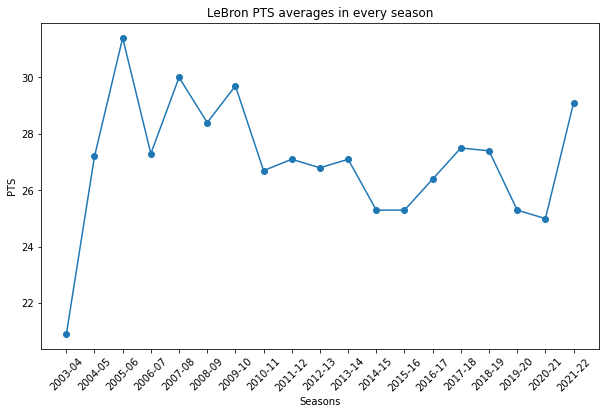

In [23]:
Season = list(LeB_C_PG_RS['Season'])
PTS = list(LeB_C_PG_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o')
plt.title('LeBron PTS averages in every season')
plt.xlabel('Seasons')
plt.ylabel('PTS')
plt.xticks(rotation=45)
plt.show()

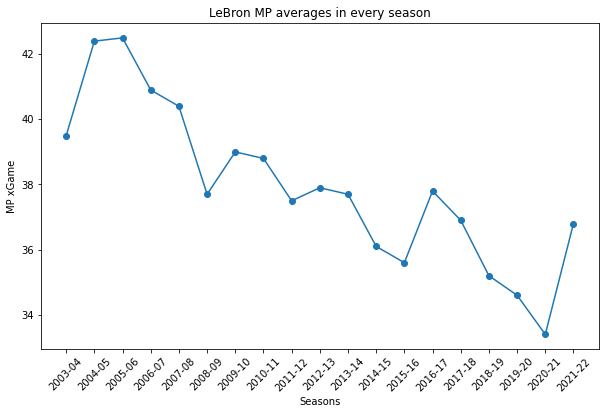

In [24]:
Season = list(LeB_C_PG_RS['Season'])
MP = list(LeB_C_PG_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o')
plt.title('LeBron MP averages in every season')
plt.xlabel('Seasons')
plt.ylabel('MP xGame')
plt.xticks(rotation=45)
plt.show()

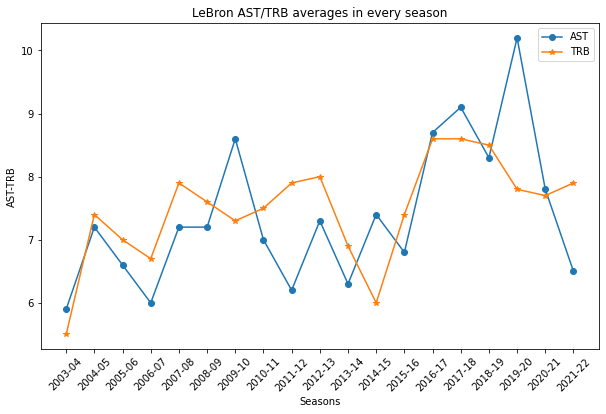

In [25]:
Season = list(LeB_C_PG_RS['Season'])
AST = list(LeB_C_PG_RS['AST'])
TRB = list(LeB_C_PG_RS['TRB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, TRB, '-*', label='TRB')
plt.title('LeBron AST/TRB averages in every season')
plt.xlabel('Seasons')
plt.ylabel('AST-TRB')
plt.xticks(rotation=45)
plt.legend()
plt.show()

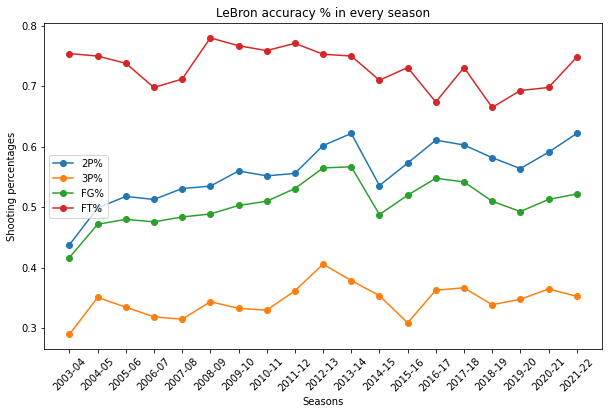

In [26]:
Season = list(LeB_C_PG_RS['Season'])
DPP = list(LeB_C_PG_RS['2P%'])
TPP = list(LeB_C_PG_RS['3P%'])
FGP = list(LeB_C_PG_RS['FG%'])
FTP = list(LeB_C_PG_RS['FT%'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPP, '-o', label='2P%')
plt.plot(Season, TPP, '-o', label='3P%')
plt.plot(Season, FGP, '-o', label='FG%')
plt.plot(Season, FTP, '-o', label='FT%')
plt.title('LeBron accuracy % in every season')
plt.xlabel('Seasons')
plt.ylabel('Shooting percentages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

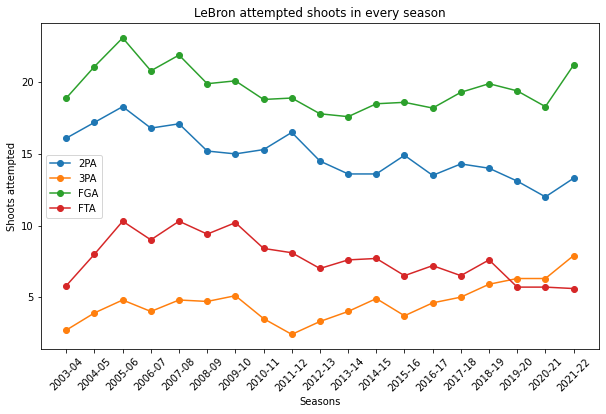

In [27]:
Season = list(LeB_C_PG_RS['Season'])
DPA = list(LeB_C_PG_RS['2PA'])
TPA = list(LeB_C_PG_RS['3PA'])
FGA = list(LeB_C_PG_RS['FGA'])
FTA = list(LeB_C_PG_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

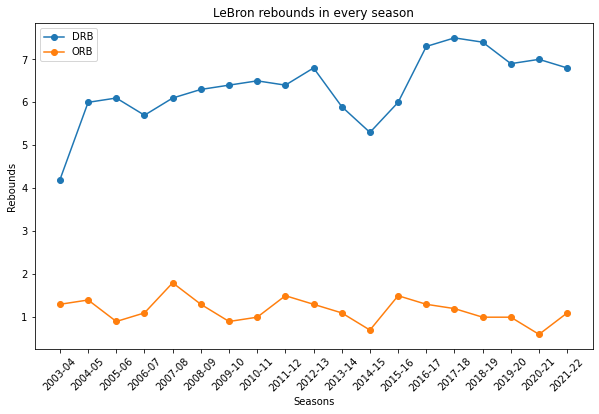

In [28]:
Season = list(LeB_C_PG_RS['Season'])
DRB = list(LeB_C_PG_RS['DRB'])
ORB = list(LeB_C_PG_RS['ORB'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DRB, '-o', label='DRB')
plt.plot(Season, ORB, '-o', label='ORB')
plt.title('LeBron rebounds in every season')
plt.xlabel('Seasons')
plt.ylabel('Rebounds')
plt.legend()
plt.xticks(rotation=45)
plt.show()

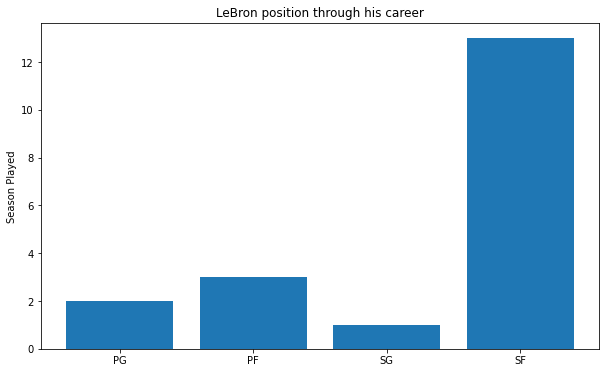

In [29]:
Season = list(LeB_C_PG_RS['Season'])
Position = list(LeB_C_PG_RS['Pos'])
PG = Position.count('PG')
PF = Position.count('PF')
SG = Position.count('SG')
SF = Position.count('SF')

x = ['PG', 'PF', 'SG', 'SF'] 
y = [PG, PF, SG, SF]

plt.figure(figsize=(10, 6))
plt.title('LeBron position through his career')
plt.bar(x, y)  #LeB_C_PG_RS['Pos'].value_counts()
plt.ylabel('Season Played')
plt.show()

Il ruolo di centro non è inserito, in quanto ha cominciato a giocarci da metà stagione quest'anno

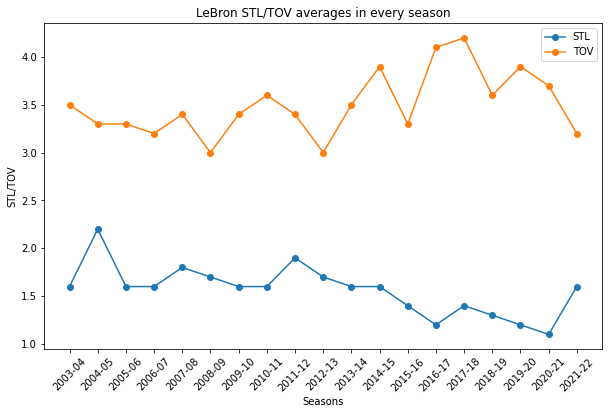

In [30]:
Season = list(LeB_C_PG_RS['Season'])
STL = list(LeB_C_PG_RS['STL'])
TOV = list(LeB_C_PG_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron STL/TOV averages in every season')
plt.xlabel('Seasons')
plt.ylabel('STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

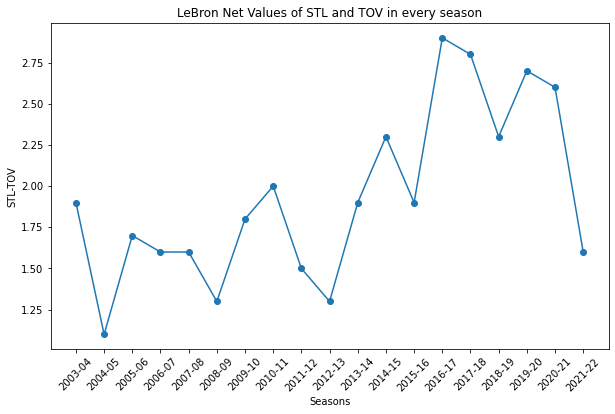

In [31]:
#NET VALUE OF STEELS AND TURNOVERS
#it is obviously negative and means that he gets more turnovers than steels.
#STL - TOV
STL_array = np.array(STL)
TOV_array = np.array(TOV)

plt.figure(figsize=(10, 6))
plt.plot(Season, TOV_array-STL_array, '-o')
plt.title('LeBron Net Values of STL and TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('STL-TOV')
plt.xticks(rotation=45)
plt.show()

In [134]:
a = LeB_C_PG_RS['PTS'].max() 
b = LeB_C_PG_RS['AST'].max()
c = LeB_C_PG_RS['TRB'].max()
d = LeB_C_PG_RS['STL'].max()
e = LeB_C_PG_RS['TOV'].max()
[a, b, c, d, e]

[31.4, 10.2, 8.6, 2.2, 4.2]

In [135]:
a = LeB_C_PG_RS['PTS'].min() 
b = LeB_C_PG_RS['AST'].min()
c = LeB_C_PG_RS['TRB'].min()
d = LeB_C_PG_RS['STL'].min()
e = LeB_C_PG_RS['TOV'].min()
[a, b, c, d, e]

[20.9, 5.9, 5.5, 1.1, 3.0]

In [136]:
a = LeB_C_PG_RS['PTS'].mean() 
b = LeB_C_PG_RS['AST'].mean()
c = LeB_C_PG_RS['TRB'].mean()
d = LeB_C_PG_RS['STL'].mean()
e = LeB_C_PG_RS['TOV'].mean()
[a, b, c, d, e]

[27.04736842105263,
 7.3842105263157904,
 7.48421052631579,
 1.5631578947368423,
 3.5]

## Totals LeBron

In [33]:
LeBron_Career_Totals_RS = pd.DataFrame(data[2])

In [34]:
for el in LeBron_Career_Totals_RS:
  if(el != "Season" and el != "Pos"  and el != "Tm" and el != "Lg"):
    LeBron_Career_Totals_RS[el] = pd.to_numeric(LeBron_Career_Totals_RS[el])

In [35]:
LeBron_Career_Totals_RS

,Season,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 30,Trp Dbl
0,2003-04,19.0,CLE,NBA,SG,79.0,79.0,3122.0,622.0,1492.0,...,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,NaN,0.0
1,2004-05,20.0,CLE,NBA,SF,80.0,80.0,3388.0,795.0,1684.0,...,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,NaN,4.0
2,2005-06,21.0,CLE,NBA,SF,79.0,79.0,3361.0,875.0,1823.0,...,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,NaN,5.0
3,2006-07,22.0,CLE,NBA,SF,78.0,78.0,3190.0,772.0,1621.0,...,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,NaN,1.0
4,2007-08,23.0,CLE,NBA,SF,75.0,74.0,3027.0,794.0,1642.0,...,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,NaN,7.0
5,2008-09,24.0,CLE,NBA,SF,81.0,81.0,3054.0,789.0,1613.0,...,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,NaN,7.0
6,2009-10,25.0,CLE,NBA,SF,76.0,76.0,2966.0,768.0,1528.0,...,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,NaN,4.0
7,2010-11,26.0,MIA,NBA,SF,79.0,79.0,3063.0,758.0,1485.0,...,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,NaN,4.0
8,2011-12,27.0,MIA,NBA,SF,62.0,62.0,2326.0,621.0,1169.0,...,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,NaN,0.0
9,2012-13,28.0,MIA,NBA,PF,76.0,76.0,2877.0,765.0,1354.0,...,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,NaN,4.0


In [36]:
LeB_C_Tot_RS1 = LeBron_Career_Totals_RS.drop(labels=range(19, 24), axis=0)

In [37]:
LeB_C_Tot_RS = LeB_C_Tot_RS1.drop(labels=['Lg', 'eFG%', 'Unnamed: 30'], axis=1)

In [38]:
LeB_C_Tot_RS

,Season,Age,Tm,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp Dbl
0,2003-04,19.0,CLE,SG,79.0,79.0,3122.0,622.0,1492.0,0.417,...,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0,0.0
1,2004-05,20.0,CLE,SF,80.0,80.0,3388.0,795.0,1684.0,0.472,...,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0,4.0
2,2005-06,21.0,CLE,SF,79.0,79.0,3361.0,875.0,1823.0,0.480,...,75.0,481.0,556.0,521.0,123.0,66.0,260.0,181.0,2478.0,5.0
3,2006-07,22.0,CLE,SF,78.0,78.0,3190.0,772.0,1621.0,0.476,...,83.0,443.0,526.0,470.0,125.0,55.0,250.0,171.0,2132.0,1.0
4,2007-08,23.0,CLE,SF,75.0,74.0,3027.0,794.0,1642.0,0.484,...,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,7.0
5,2008-09,24.0,CLE,SF,81.0,81.0,3054.0,789.0,1613.0,0.489,...,106.0,507.0,613.0,587.0,137.0,93.0,241.0,139.0,2304.0,7.0
6,2009-10,25.0,CLE,SF,76.0,76.0,2966.0,768.0,1528.0,0.503,...,71.0,483.0,554.0,651.0,125.0,77.0,261.0,119.0,2258.0,4.0
7,2010-11,26.0,MIA,SF,79.0,79.0,3063.0,758.0,1485.0,0.510,...,80.0,510.0,590.0,554.0,124.0,50.0,284.0,163.0,2111.0,4.0
8,2011-12,27.0,MIA,SF,62.0,62.0,2326.0,621.0,1169.0,0.531,...,94.0,398.0,492.0,387.0,115.0,50.0,213.0,96.0,1683.0,0.0
9,2012-13,28.0,MIA,PF,76.0,76.0,2877.0,765.0,1354.0,0.565,...,97.0,513.0,610.0,551.0,129.0,67.0,226.0,110.0,2036.0,4.0


In [39]:
LeB_C_Tot_RS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 18
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Season   19 non-null     object 
 1   Age      19 non-null     float64
 2   Tm       19 non-null     object 
 3   Pos      19 non-null     object 
 4   G        19 non-null     float64
 5   GS       19 non-null     float64
 6   MP       19 non-null     float64
 7   FG       19 non-null     float64
 8   FGA      19 non-null     float64
 9   FG%      19 non-null     float64
 10  3P       19 non-null     float64
 11  3PA      19 non-null     float64
 12  3P%      19 non-null     float64
 13  2P       19 non-null     float64
 14  2PA      19 non-null     float64
 15  2P%      19 non-null     float64
 16  FT       19 non-null     float64
 17  FTA      19 non-null     float64
 18  FT%      19 non-null     float64
 19  ORB      19 non-null     float64
 20  DRB      19 non-null     float64
 21  TRB      19 non-nu

In [40]:
LeB_C_Tot_RS.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp Dbl
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,28.000000,71.105263,71.052632,2713.842105,702.947368,1393.263158,0.506842,110.157895,319.000000,0.345368,...,83.368421,446.894737,530.263158,524.315789,112.000000,53.789474,248.578947,130.894737,1924.157895,5.421053
std,5.627314,12.045722,12.029933,563.251203,125.885518,265.630872,0.036005,24.567963,67.448746,0.026837,...,25.878370,81.991798,98.631098,116.297536,30.168048,18.512995,47.714796,29.535092,374.240158,4.776282
min,19.000000,41.000000,41.000000,1504.000000,422.000000,823.000000,0.417000,54.000000,149.000000,0.290000,...,29.000000,278.000000,324.000000,266.000000,48.000000,25.000000,131.000000,70.000000,1126.000000,0.000000
25%,23.500000,68.000000,68.000000,2409.500000,623.000000,1291.000000,0.486000,101.000000,283.500000,0.331500,...,68.500000,403.000000,478.500000,467.500000,98.000000,42.000000,233.500000,114.000000,1690.500000,2.500000
50%,28.000000,76.000000,76.000000,2902.000000,758.000000,1416.000000,0.510000,113.000000,323.000000,0.348000,...,83.000000,459.000000,554.000000,521.000000,121.000000,50.000000,260.000000,135.000000,2036.000000,4.000000
75%,32.500000,79.000000,79.000000,3058.500000,780.500000,1596.500000,0.526500,125.500000,369.000000,0.362500,...,98.000000,495.000000,591.000000,582.000000,127.000000,66.500000,271.000000,147.500000,2212.500000,7.000000
max,37.000000,82.000000,82.000000,3388.000000,875.000000,1823.000000,0.567000,149.000000,425.000000,0.406000,...,133.000000,612.000000,709.000000,747.000000,177.000000,93.000000,347.000000,181.000000,2478.000000,18.000000


In [41]:
New_LeB_C_Tot_RS = LeB_C_Tot_RS.drop(['ORB', 'DRB', 'PF', 'GS', 'FG%', '2P%', '3P%', 'FT%', 'Trp Dbl', 'Tm', 'Season', 'Age'], axis=1)
New_LeB_C_Tot_RS

,Pos,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
0,SG,79.0,3122.0,622.0,1492.0,63.0,217.0,559.0,1275.0,347.0,460.0,432.0,465.0,130.0,58.0,273.0,1654.0
1,SF,80.0,3388.0,795.0,1684.0,108.0,308.0,687.0,1376.0,477.0,636.0,588.0,577.0,177.0,52.0,262.0,2175.0
2,SF,79.0,3361.0,875.0,1823.0,127.0,379.0,748.0,1444.0,601.0,814.0,556.0,521.0,123.0,66.0,260.0,2478.0
3,SF,78.0,3190.0,772.0,1621.0,99.0,310.0,673.0,1311.0,489.0,701.0,526.0,470.0,125.0,55.0,250.0,2132.0
4,SF,75.0,3027.0,794.0,1642.0,113.0,359.0,681.0,1283.0,549.0,771.0,592.0,539.0,138.0,81.0,255.0,2250.0
5,SF,81.0,3054.0,789.0,1613.0,132.0,384.0,657.0,1229.0,594.0,762.0,613.0,587.0,137.0,93.0,241.0,2304.0
6,SF,76.0,2966.0,768.0,1528.0,129.0,387.0,639.0,1141.0,593.0,773.0,554.0,651.0,125.0,77.0,261.0,2258.0
7,SF,79.0,3063.0,758.0,1485.0,92.0,279.0,666.0,1206.0,503.0,663.0,590.0,554.0,124.0,50.0,284.0,2111.0
8,SF,62.0,2326.0,621.0,1169.0,54.0,149.0,567.0,1020.0,387.0,502.0,492.0,387.0,115.0,50.0,213.0,1683.0
9,PF,76.0,2877.0,765.0,1354.0,103.0,254.0,662.0,1100.0,403.0,535.0,610.0,551.0,129.0,67.0,226.0,2036.0


In [42]:
New_LeB_C_Tot_RS.describe()

,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,71.105263,2713.842105,702.947368,1393.263158,110.157895,319.000000,592.789474,1074.263158,408.105263,556.157895,530.263158,524.315789,112.000000,53.789474,248.578947,1924.157895
std,12.045722,563.251203,125.885518,265.630872,24.567963,67.448746,121.179196,253.261139,129.971747,167.896550,98.631098,116.297536,30.168048,18.512995,47.714796,374.240158
min,41.000000,1504.000000,422.000000,823.000000,54.000000,149.000000,318.000000,538.000000,172.000000,230.000000,324.000000,266.000000,48.000000,25.000000,131.000000,1126.000000
25%,68.000000,2409.500000,623.000000,1291.000000,101.000000,283.500000,531.500000,971.000000,352.500000,475.500000,478.500000,467.500000,98.000000,42.000000,233.500000,1690.500000
50%,76.000000,2902.000000,758.000000,1416.000000,113.000000,323.000000,650.000000,1134.000000,388.000000,531.000000,554.000000,521.000000,121.000000,50.000000,260.000000,2036.000000
75%,79.000000,3058.500000,780.500000,1596.500000,125.500000,369.000000,669.500000,1252.000000,496.000000,682.000000,591.000000,582.000000,127.000000,66.500000,271.000000,2212.500000
max,82.000000,3388.000000,875.000000,1823.000000,149.000000,425.000000,748.000000,1444.000000,601.000000,814.000000,709.000000,747.000000,177.000000,93.000000,347.000000,2478.000000


array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'FG'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'TOV'}>]], dtype=object)

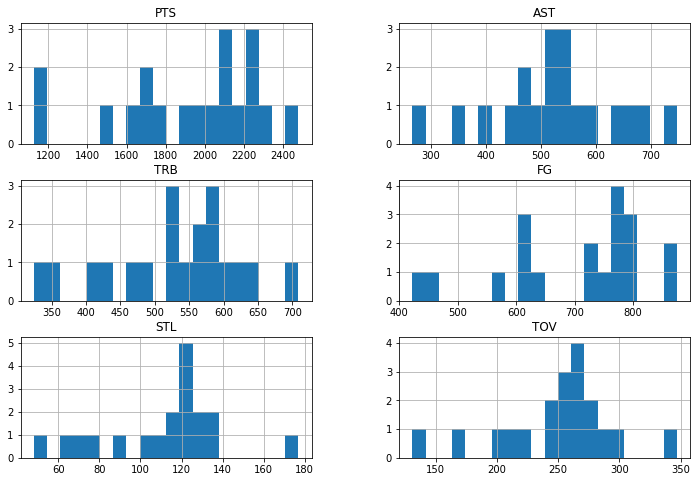

In [43]:
New_LeB_C_Tot_RS[['PTS', 'AST', 'TRB', 'FG', 'STL', 'TOV']].hist(bins=20, figsize=(12, 8))

In [44]:
New_LeB_C_Tot_RS.corr()

,G,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,TRB,AST,STL,BLK,TOV,PTS
G,1.000000,0.964008,0.913985,0.913023,0.104504,0.169032,0.928295,0.912600,0.776051,0.778536,0.798601,0.708216,0.815609,0.586795,0.835890,0.891265
MP,0.964008,1.000000,0.913875,0.959816,0.046601,0.129980,0.939920,0.972079,0.837727,0.842426,0.730166,0.592019,0.885848,0.608065,0.745143,0.908809
FG,0.913985,0.913875,1.000000,0.920826,0.285563,0.326038,0.980942,0.878970,0.838273,0.850818,0.884444,0.704698,0.763777,0.627895,0.747174,0.982627
FGA,0.913023,0.959816,0.920826,1.000000,0.180297,0.306084,0.920035,0.967325,0.864033,0.878661,0.720871,0.616154,0.828803,0.684997,0.698725,0.931398
3P,0.104504,0.046601,0.285563,0.180297,1.000000,0.952681,0.093913,-0.064615,0.121557,0.154422,0.333270,0.589293,-0.120830,0.173892,0.283985,0.299977
3PA,0.169032,0.129980,0.326038,0.306084,0.952681,1.000000,0.145554,0.054713,0.222763,0.265366,0.318750,0.591214,-0.067793,0.269218,0.309066,0.359249
2P,0.928295,0.939920,0.980942,0.920035,0.093913,0.145554,1.000000,0.926207,0.846185,0.852554,0.851227,0.612593,0.817937,0.617026,0.718617,0.959972
2PA,0.912600,0.972079,0.878970,0.967325,-0.064615,0.054713,0.926207,1.000000,0.846907,0.850904,0.671189,0.488795,0.887338,0.646755,0.650541,0.881214
FT,0.776051,0.837727,0.838273,0.864033,0.121557,0.222763,0.846185,0.846907,1.000000,0.990749,0.618026,0.446320,0.791664,0.738113,0.485126,0.919225
FTA,0.778536,0.842426,0.850818,0.878661,0.154422,0.265366,0.852554,0.850904,0.990749,1.000000,0.633368,0.468291,0.766047,0.712466,0.514757,0.926610


<AxesSubplot:>

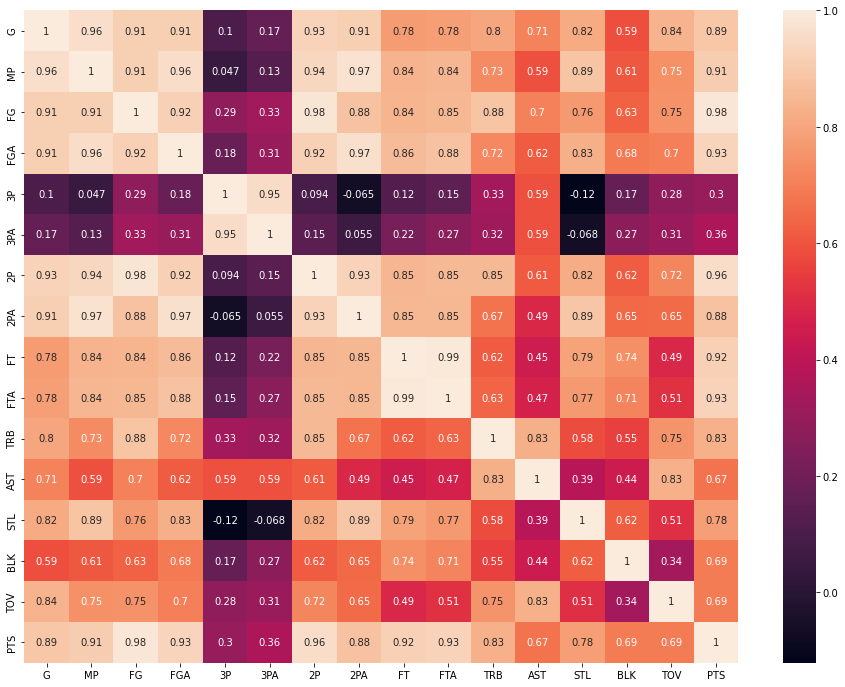

In [45]:
plt.figure(figsize=(16, 12))
sb.heatmap(New_LeB_C_Tot_RS.corr(), annot=True)

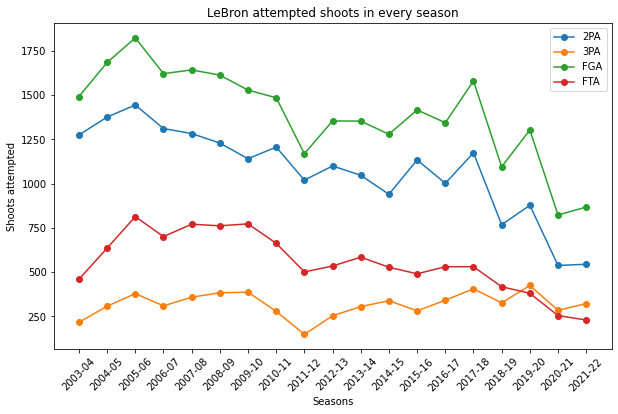

In [46]:
Season = list(LeB_C_Tot_RS['Season'])
DPA = list(LeB_C_Tot_RS['2PA'])
TPA = list(LeB_C_Tot_RS['3PA'])
FGA = list(LeB_C_Tot_RS['FGA'])
FTA = list(LeB_C_Tot_RS['FTA'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DPA, '-o', label='2PA')
plt.plot(Season, TPA, '-o', label='3PA')
plt.plot(Season, FGA, '-o', label='FGA')
plt.plot(Season, FTA, '-o', label='FTA')
plt.title('LeBron attempted shoots in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots attempted')
plt.legend()
plt.xticks(rotation=45)
plt.show()

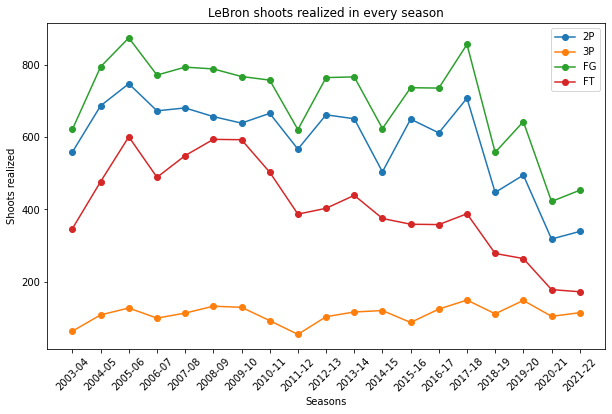

In [47]:
Season = list(LeB_C_Tot_RS['Season'])
DP = list(LeB_C_Tot_RS['2P'])
TP = list(LeB_C_Tot_RS['3P'])
FG = list(LeB_C_Tot_RS['FG'])
FT = list(LeB_C_Tot_RS['FT'])

plt.figure(figsize=(10, 6))
plt.plot(Season, DP, '-o', label='2P')
plt.plot(Season, TP, '-o', label='3P')
plt.plot(Season, FG, '-o', label='FG')
plt.plot(Season, FT, '-o', label='FT')
plt.title('LeBron shoots realized in every season')
plt.xlabel('Seasons')
plt.ylabel('Shoots realized')
plt.legend()
plt.xticks(rotation=45)
plt.show()

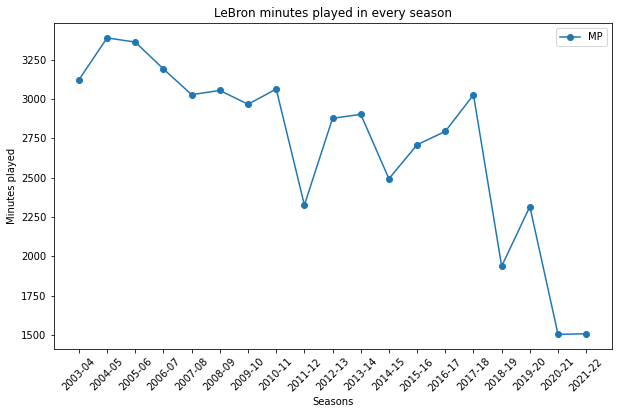

In [48]:
Season = list(LeB_C_Tot_RS['Season'])
MP = list(LeB_C_Tot_RS['MP'])

plt.figure(figsize=(10, 6))
plt.plot(Season, MP, '-o', label='MP')
plt.title('LeBron minutes played in every season')
plt.xlabel('Seasons')
plt.ylabel('Minutes played')
plt.legend()
plt.xticks(rotation=45)
plt.show()

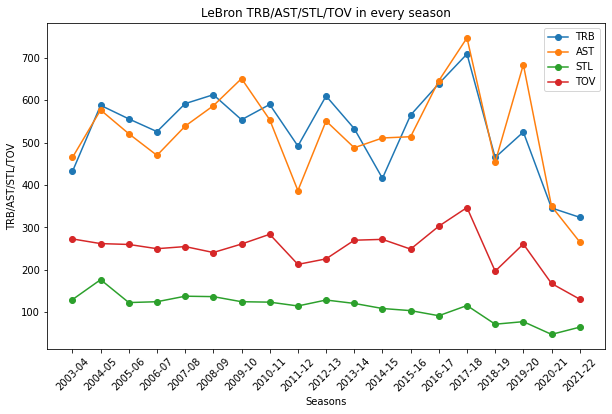

In [49]:
Season = list(LeB_C_Tot_RS['Season'])
TRB = list(LeB_C_Tot_RS['TRB'])
AST = list(LeB_C_Tot_RS['AST'])
STL = list(LeB_C_Tot_RS['STL'])
TOV = list(LeB_C_Tot_RS['TOV'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TRB, '-o', label='TRB')
plt.plot(Season, AST, '-o', label='AST')
plt.plot(Season, STL, '-o', label='STL')
plt.plot(Season, TOV, '-o', label='TOV')
plt.title('LeBron TRB/AST/STL/TOV in every season')
plt.xlabel('Seasons')
plt.ylabel('TRB/AST/STL/TOV')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [50]:
#minuti totali per stagione
a = LeB_C_Tot_RS['MP'].max()
b = LeB_C_Tot_RS['MP'].mean()
c = LeB_C_Tot_RS['MP'].min()
[a, b, c]

[3388.0, 2713.842105263158, 1504.0]

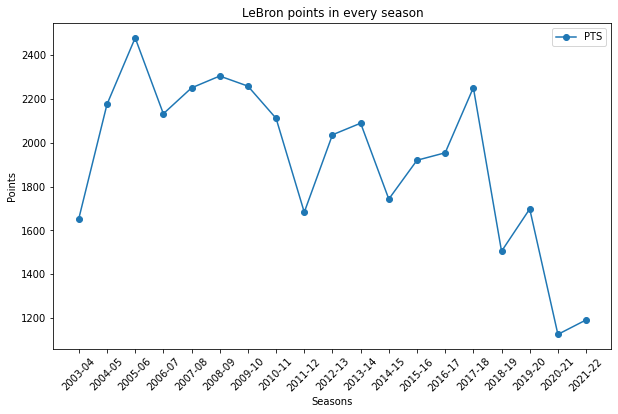

In [51]:
Season = list(LeB_C_Tot_RS['Season'])
PTS = list(LeB_C_Tot_RS['PTS'])

plt.figure(figsize=(10, 6))
plt.plot(Season, PTS, '-o', label='PTS')
plt.title('LeBron points in every season')
plt.xlabel('Seasons')
plt.ylabel('Points')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [52]:
#sommare punti a seconda della squadra e vedere con quale squadra ha una media punti più alta

a = LeB_C_Tot_RS['PTS'][0]
b = LeB_C_Tot_RS['PTS'][1]
c = LeB_C_Tot_RS['PTS'][2]
d = LeB_C_Tot_RS['PTS'][3]
e = LeB_C_Tot_RS['PTS'][4]
f = LeB_C_Tot_RS['PTS'][5]
g = LeB_C_Tot_RS['PTS'][6]
h = LeB_C_Tot_RS['PTS'][7]
i = LeB_C_Tot_RS['PTS'][8]
j = LeB_C_Tot_RS['PTS'][9]
k = LeB_C_Tot_RS['PTS'][10]
l = LeB_C_Tot_RS['PTS'][11]
m = LeB_C_Tot_RS['PTS'][12]
n = LeB_C_Tot_RS['PTS'][13]
o = LeB_C_Tot_RS['PTS'][14]
p = LeB_C_Tot_RS['PTS'][15]
q = LeB_C_Tot_RS['PTS'][16]
r = LeB_C_Tot_RS['PTS'][17]
s = LeB_C_Tot_RS['PTS'][18]

PTS_CLE = [a, b, c, d, e, f, g, l, m, n, o]
PTS_MIA = [h, i, j, k]
PTS_LAL = [p, q, r, s]

In [53]:
a = sum(PTS_CLE)/11
b = sum(PTS_MIA)/4
c = sum(PTS_LAL)/4
[a, b, c] #average points per season for every team

[2101.7272727272725, 1979.75, 1380.25]

In [54]:
#punti totali per stagione
a = LeB_C_Tot_RS['PTS'].max()
b = LeB_C_Tot_RS['PTS'].mean()
c = LeB_C_Tot_RS['PTS'].min()
[a, b, c]

[2478.0, 1924.157894736842, 1126.0]

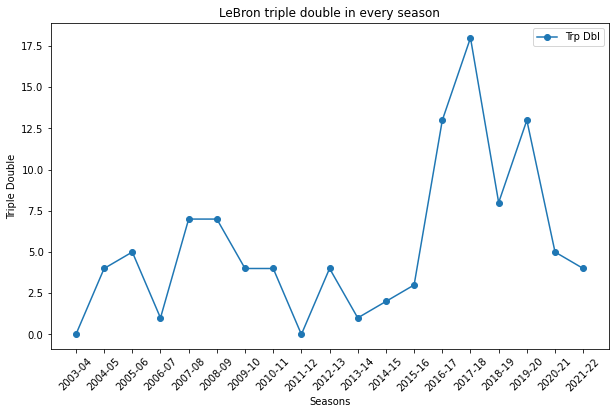

In [55]:
Season = list(LeB_C_Tot_RS['Season'])
TD = list(LeB_C_Tot_RS['Trp Dbl'])

plt.figure(figsize=(10, 6))
plt.plot(Season, TD, '-o', label='Trp Dbl')
plt.title('LeBron triple double in every season')
plt.xlabel('Seasons')
plt.ylabel('Triple Double')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [56]:
a = LeB_C_Tot_RS['Trp Dbl'].max()
b = LeB_C_Tot_RS['Trp Dbl'].mean()
c = LeB_C_Tot_RS['Trp Dbl'].min()
[a, b, c]

[18.0, 5.421052631578948, 0.0]

## Injuries

In [57]:
#LeBron_Career_Injuries = pd.read_html('https://www.foxsports.com/nba/lebron-james-player-injuries')

In [58]:
LeBron_Career_Injuries = pd.read_csv('LeBron_Injuries.csv', delimiter=';')

In [59]:
LeBron_Career_Injuries

,DATE,DESCRIPTION,MATCH MISSED
0,02/12/2022,Knee,0
1,02/07/2022,Knee,0
2,01/27/2022,Knee,5
3,01/22/2022,Abdomen,0
4,01/20/2022,Abdominal,0
...,...,...,...
100,02/11/2019,Undisclosed,0
101,02/09/2019,Load Management,0
102,02/06/2019,Load Management,0
103,02/04/2019,Rest,1


In [60]:
#mettere colonna tabella con le partite saltate da LeBron per infortunio (excel su pc)

# Season 2020/2021 analysis:
* +/- effort by players assuming their role, Advanced Stats
* Season trends, Per Game Stats

## Advanced Stats

In [61]:
data_adv = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_advanced.html')
df_adv = pd.DataFrame(data_adv[0])
Adv_Stats = df_adv.where(df_adv["Player"] != "Player").dropna(how='all',axis=0)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,.550,.004,...,NaN,0.3,1.0,1.3,.085,NaN,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,.125,.250,...,NaN,-0.1,0.0,-0.1,-0.252,NaN,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,.596,.010,...,NaN,2.3,1.7,4.0,.119,NaN,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,.626,.010,...,NaN,5.6,3.2,8.8,.197,NaN,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,.556,.270,...,NaN,0.5,0.6,1.1,.080,NaN,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,.563,.369,...,NaN,0.8,0.5,1.3,.092,NaN,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,.578,.068,...,NaN,2.8,2.2,5.1,.147,NaN,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,.589,.357,...,NaN,5.9,1.3,7.2,.163,NaN,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,.599,.086,...,NaN,2.1,1.1,3.3,.156,NaN,-0.2,-0.2,-0.5,0.4


In [62]:
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           705 non-null    object 
 1   Player       705 non-null    object 
 2   Pos          705 non-null    object 
 3   Age          705 non-null    object 
 4   Tm           705 non-null    object 
 5   G            705 non-null    object 
 6   MP           705 non-null    object 
 7   PER          705 non-null    object 
 8   TS%          703 non-null    object 
 9   3PAr         703 non-null    object 
 10  FTr          703 non-null    object 
 11  ORB%         705 non-null    object 
 12  DRB%         705 non-null    object 
 13  TRB%         705 non-null    object 
 14  AST%         705 non-null    object 
 15  STL%         705 non-null    object 
 16  BLK%         705 non-null    object 
 17  TOV%         704 non-null    object 
 18  USG%         705 non-null    object 
 19  Unnamed:

In [63]:
for el in Adv_Stats:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    Adv_Stats[el] = pd.to_numeric(Adv_Stats[el])

In [64]:
Adv_Stats.drop(['Unnamed: 19', 'Unnamed: 24'], axis=1, inplace=True)
Adv_Stats

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,PF,21,MIA,61,737,14.2,0.550,0.004,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,PG,24,MIL,7,18,-6.5,0.125,0.250,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,C,27,NOP,58,1605,15.1,0.596,0.010,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,C,23,MIA,64,2143,22.7,0.626,0.010,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,C,35,TOT,26,674,15.7,0.556,0.270,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536,Delon Wright,PG,28,SAC,27,696,15.9,0.563,0.369,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
727,537,Thaddeus Young,PF,32,CHI,68,1652,20.3,0.578,0.068,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
728,538,Trae Young,PG,22,ATL,63,2125,23.0,0.589,0.357,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
729,539,Cody Zeller,C,28,CHO,48,1005,18.2,0.599,0.086,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


In [65]:
Adv_Stats['TOV%'].fillna(0, inplace=True)
Adv_Stats['TS%'].fillna(0, inplace=True)
Adv_Stats['3PAr'].fillna(0, inplace=True)
Adv_Stats['FTr'].fillna(0, inplace=True)
Adv_Stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 730
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      705 non-null    int64  
 1   Player  705 non-null    object 
 2   Pos     705 non-null    object 
 3   Age     705 non-null    int64  
 4   Tm      705 non-null    object 
 5   G       705 non-null    int64  
 6   MP      705 non-null    int64  
 7   PER     705 non-null    float64
 8   TS%     705 non-null    float64
 9   3PAr    705 non-null    float64
 10  FTr     705 non-null    float64
 11  ORB%    705 non-null    float64
 12  DRB%    705 non-null    float64
 13  TRB%    705 non-null    float64
 14  AST%    705 non-null    float64
 15  STL%    705 non-null    float64
 16  BLK%    705 non-null    float64
 17  TOV%    705 non-null    float64
 18  USG%    705 non-null    float64
 19  OWS     705 non-null    float64
 20  DWS     705 non-null    float64
 21  WS      705 non-null    float64
 22  WS

In [66]:
Adv_Stats.drop(['Rk', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'FTr'], axis=1, inplace=True)

In [67]:
Adv_Stats_1 = Adv_Stats.where(Adv_Stats["Tm"] != "TOT").dropna(how='all',axis=0) #da mettere per togliere i totali
#for el in Adv_Stats['Tm']:
 # if(el == "TOT"):
  #  Adv_Stats.dropna(how='all', axis=0)
#Adv_Stats
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   USG%    626 non-null    float64
 10  OWS     626 non-null    float64
 11  DWS     626 non-null    float64
 12  WS      626 non-null    float64
 13  WS/48   626 non-null    float64
 14  OBPM    626 non-null    float64
 15  DBPM    626 non-null    float64
 16  BPM     626 non-null    float64
 17  VORP    626 non-null    float64
dtypes: float64(15), object(3)
memory usage: 92.9+ KB


In [68]:
Adv_Stats_1.describe()

,Age,G,MP,PER,TS%,3PAr,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,25.728435,36.827476,833.063898,12.641214,0.539903,0.392224,18.502556,0.909744,0.845527,1.757188,0.070399,-1.715335,-0.180032,-1.896645,0.420767
std,4.096405,21.790911,690.067363,6.957372,0.113518,0.225744,5.624108,1.562936,0.830453,2.197137,0.108498,4.210557,1.581503,5.072076,1.022648
min,19.000000,1.000000,3.000000,-40.600000,0.000000,0.000000,0.000000,-2.900000,0.000000,-1.900000,-1.113000,-40.700000,-8.600000,-46.600000,-1.700000
25%,23.000000,18.000000,218.000000,9.625000,0.503250,0.239250,14.625000,0.000000,0.200000,0.200000,0.036000,-3.300000,-1.000000,-3.600000,-0.100000
50%,25.000000,36.000000,674.000000,12.500000,0.552000,0.409500,18.000000,0.300000,0.600000,0.900000,0.080000,-1.400000,-0.200000,-1.400000,0.100000
75%,28.000000,57.750000,1347.000000,16.300000,0.598000,0.543750,21.700000,1.400000,1.300000,2.800000,0.124750,0.400000,0.700000,0.600000,0.600000
max,40.000000,72.000000,2667.000000,54.600000,1.078000,1.000000,41.400000,12.200000,5.200000,15.600000,0.475000,24.100000,8.200000,31.100000,8.800000


In [69]:
Adv_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 0 to 730
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  626 non-null    object 
 1   Pos     626 non-null    object 
 2   Age     626 non-null    float64
 3   Tm      626 non-null    object 
 4   G       626 non-null    float64
 5   MP      626 non-null    float64
 6   PER     626 non-null    float64
 7   TS%     626 non-null    float64
 8   3PAr    626 non-null    float64
 9   USG%    626 non-null    float64
 10  OWS     626 non-null    float64
 11  DWS     626 non-null    float64
 12  WS      626 non-null    float64
 13  WS/48   626 non-null    float64
 14  OBPM    626 non-null    float64
 15  DBPM    626 non-null    float64
 16  BPM     626 non-null    float64
 17  VORP    626 non-null    float64
dtypes: float64(15), object(3)
memory usage: 92.9+ KB


In [70]:
Adv_Stats_1.to_csv('Adv_Stats_1.csv', index=False)

In [71]:
Adv_Stats_1[['Pos', 'Tm']].describe()

,Pos,Tm
count,626,626
unique,5,30
top,SG,HOU
freq,147,30


<AxesSubplot:>

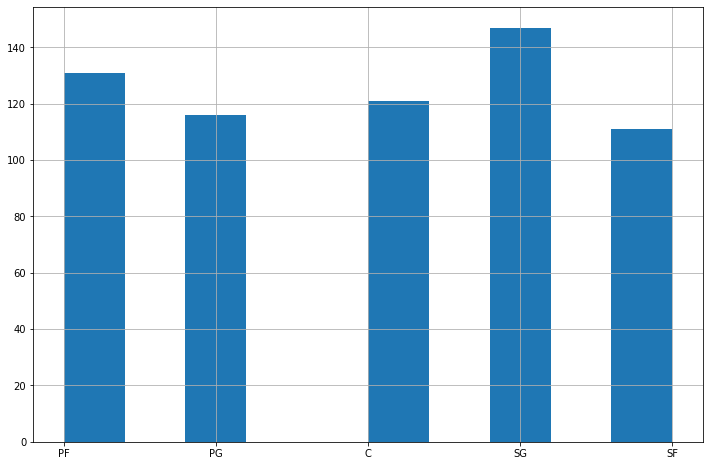

In [72]:
Adv_Stats_1['Pos'].hist(bins=10, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'MP'}>,
        <AxesSubplot:title={'center':'PER'}>],
       [<AxesSubplot:title={'center':'TS%'}>,
        <AxesSubplot:title={'center':'3PAr'}>,
        <AxesSubplot:title={'center':'USG%'}>,
        <AxesSubplot:title={'center':'OWS'}>],
       [<AxesSubplot:title={'center':'DWS'}>,
        <AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'VORP'}>, <AxesSubplot:>]],
      dtype=object)

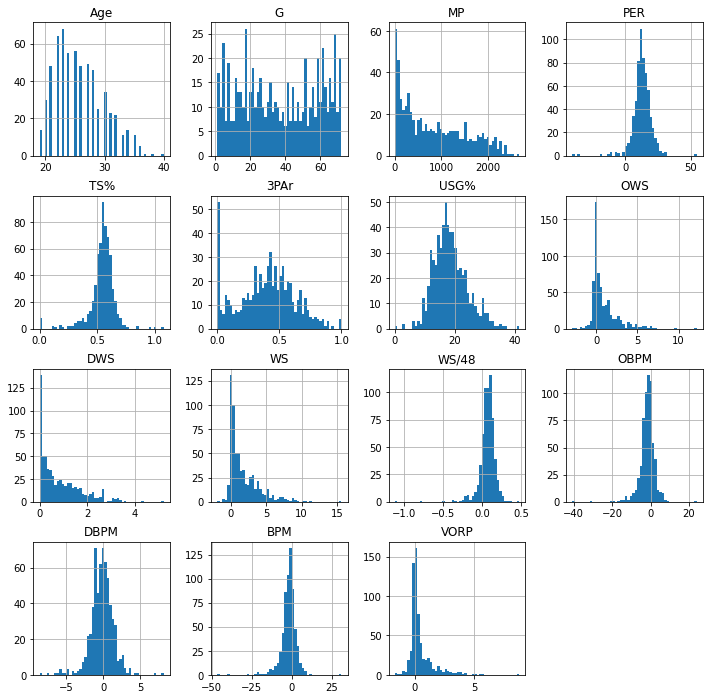

In [73]:
Adv_Stats_1.hist(bins=50, figsize=(12,12))

<AxesSubplot:>

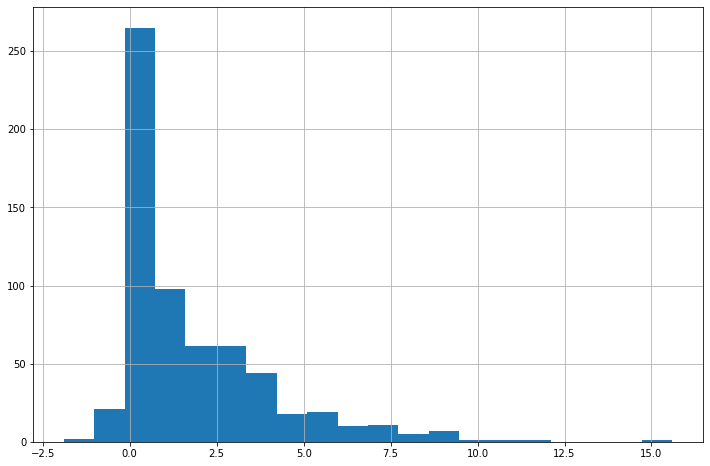

In [74]:
Adv_Stats_1['WS'].hist(bins=20, figsize=(12,8))

In [75]:
#interesting stats, max/mean/min of WS/OWS/DWS/OBPM/DBPM/BPM/VORP

array([[<AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'WS/48'}>],
       [<AxesSubplot:title={'center':'OWS'}>,
        <AxesSubplot:title={'center':'DWS'}>]], dtype=object)

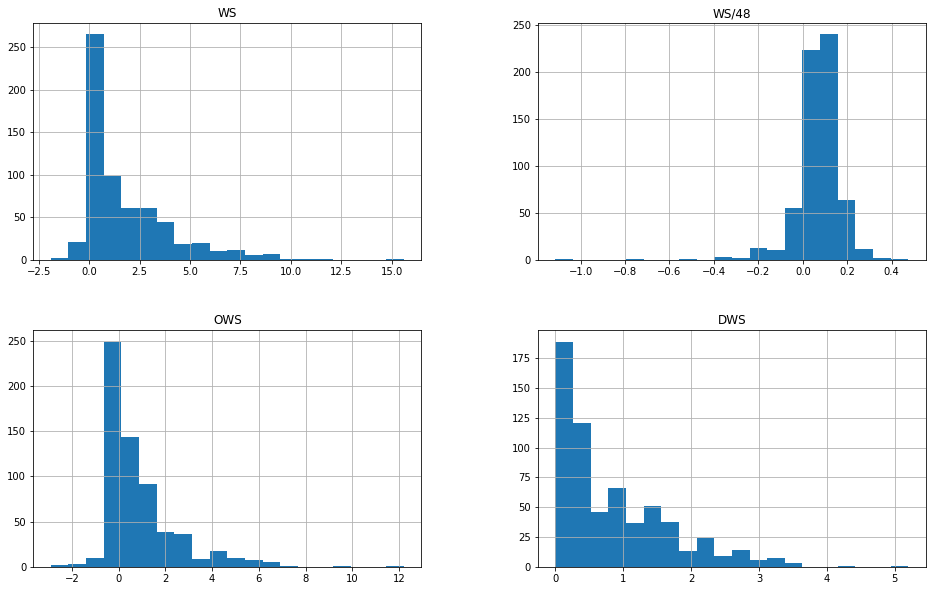

In [76]:
Adv_Stats_1[['WS', 'WS/48', 'OWS', 'DWS']].hist(bins=20, figsize=(16,10))

In [77]:
a = Adv_Stats_1['WS'].mean()
b = Adv_Stats_1['WS/48'].mean()
c = Adv_Stats_1['OWS'].mean()
d = Adv_Stats_1['DWS'].mean()
[a, b, c, d]

[1.7571884984025559,
 0.07039936102236422,
 0.9097444089456869,
 0.8455271565495207]

In [78]:
a = Adv_Stats_1['WS'].min()
b = Adv_Stats_1['WS/48'].min()
c = Adv_Stats_1['OWS'].min()
d = Adv_Stats_1['DWS'].min()
[a, b, c, d]

[-1.9, -1.113, -2.9, 0.0]

In [79]:
a = Adv_Stats_1['WS'].max()
b = Adv_Stats_1['WS/48'].max()
c = Adv_Stats_1['OWS'].max()
d = Adv_Stats_1['DWS'].max()
[a, b, c, d]

[15.6, 0.475, 12.2, 5.2]

In [80]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS', ascending=False)[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Nikola Jokić,15.6,0.301,12.2,3.4
Rudy Gobert,11.3,0.248,6.1,5.2
Damian Lillard,10.4,0.209,9.6,0.8
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Jimmy Butler,9.3,0.255,6.6,2.7
...,...,...,...,...
Théo Maledon,-0.8,-0.021,-1.9,1.1
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4


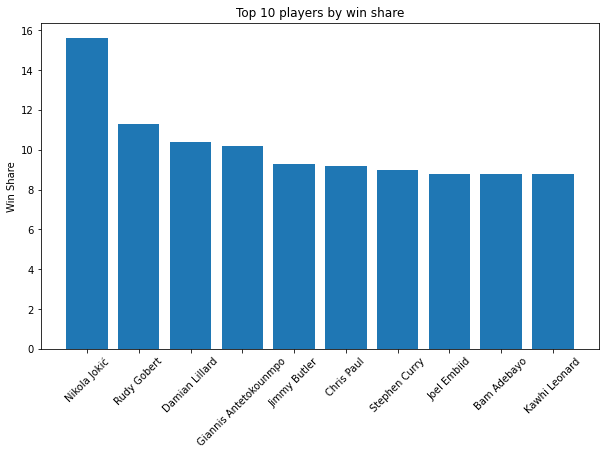

In [81]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [82]:
a = players_by_most_win_share['WS']['Stephen Curry']
b = players_by_most_win_share['WS']['LeBron James']
c = players_by_most_win_share['WS']['Giannis Antetokounmpo']
d = players_by_most_win_share['WS']['John Wall']
[a, b, c, d]

[9.0, 5.6, 10.2, -0.2]

In [83]:
players_by_most_win_share['WS'].mean()

1.7571884984025559

In [84]:
players_by_most_win_share = Adv_Stats_1.sort_values(by='WS')[['Player', 'WS', 'WS/48', 'OWS', 'DWS']]
players_by_most_win_share.set_index('Player', inplace=True)
players_by_most_win_share

,WS,WS/48,OWS,DWS
Player,,,,
Aleksej Pokusevski,-1.9,-0.084,-2.9,1.0
Killian Hayes,-1.1,-0.081,-1.8,0.6
Josh Hall,-0.9,-0.126,-1.1,0.2
Darius Bazley,-0.9,-0.026,-2.3,1.4
Théo Maledon,-0.8,-0.021,-1.9,1.1
...,...,...,...,...
Jimmy Butler,9.3,0.255,6.6,2.7
Giannis Antetokounmpo,10.2,0.244,6.9,3.3
Damian Lillard,10.4,0.209,9.6,0.8


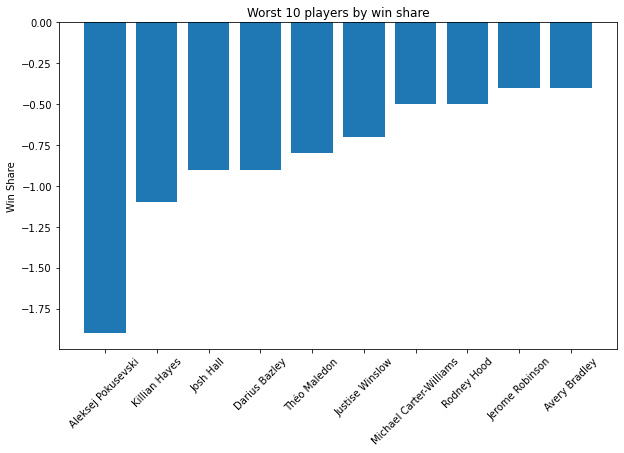

In [85]:
x = players_by_most_win_share[:10].index
y = players_by_most_win_share[:10]['WS']
plt.figure(figsize=(10,6))
plt.title('Worst 10 players by win share')
plt.bar(x, y)
plt.ylabel('Win Share')
plt.xticks(rotation=45)
plt.show()

In [86]:
Adv_players_groupby = Adv_Stats_1.groupby('Player')

In [87]:
Adv_players_groupby_sum = Adv_players_groupby.sum()

In [88]:
a = Adv_players_groupby_sum['WS'].loc['LeBron James']
b = Adv_players_groupby_sum['WS'].loc['Stephen Curry']
c = Adv_players_groupby_sum['WS'].loc['Nikola Jokić']
[a, b, c]

[5.6, 9.0, 15.6]

<AxesSubplot:>

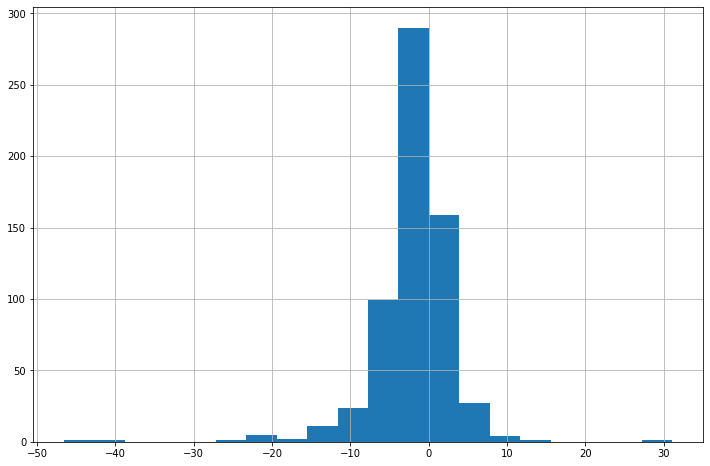

In [89]:
Adv_Stats_1['BPM'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'BPM'}>,
        <AxesSubplot:title={'center':'OBPM'}>],
       [<AxesSubplot:title={'center':'DBPM'}>,
        <AxesSubplot:title={'center':'VORP'}>]], dtype=object)

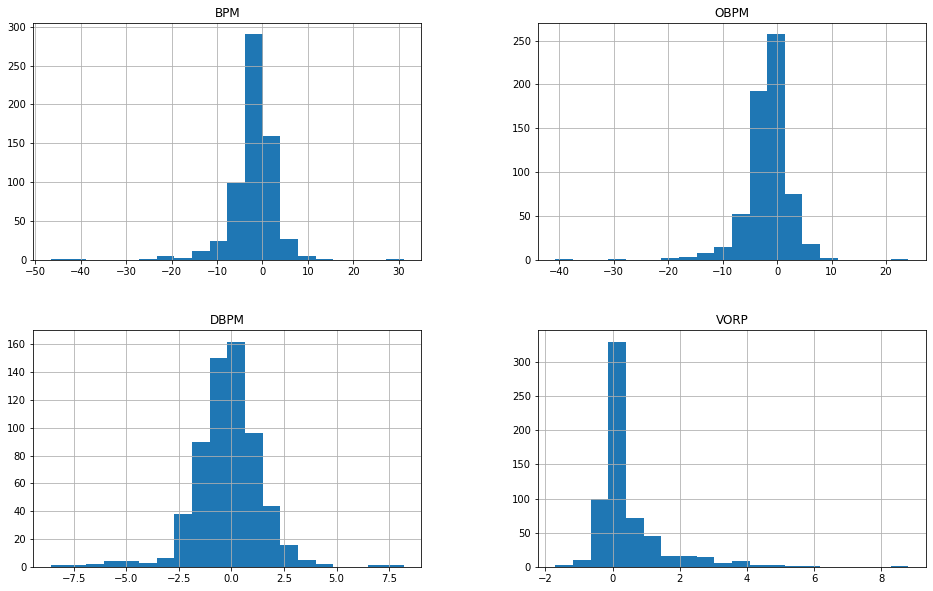

In [90]:
Adv_Stats_1[['BPM', 'OBPM', 'DBPM', 'VORP']].hist(bins=20, figsize=(16,10))

In [91]:
a = Adv_Stats_1['BPM'].mean()
b = Adv_Stats_1['VORP'].mean()
c = Adv_Stats_1['OBPM'].mean()
d = Adv_Stats_1['DBPM'].mean()
[a, b, c, d]

[-1.8966453674121404,
 0.42076677316293926,
 -1.7153354632587858,
 -0.1800319488817891]

In [92]:
a = Adv_Stats_1['BPM'].min()
b = Adv_Stats_1['VORP'].min()
c = Adv_Stats_1['OBPM'].min()
d = Adv_Stats_1['DBPM'].min()
[a, b, c, d]

[-46.6, -1.7, -40.7, -8.6]

In [93]:
a = Adv_Stats_1['BPM'].max()
b = Adv_Stats_1['VORP'].max()
c = Adv_Stats_1['OBPM'].max()
d = Adv_Stats_1['DBPM'].max()
[a, b, c, d]

[31.1, 8.8, 24.1, 8.2]

In [94]:
players_by_most_BPM = Adv_Stats_1.sort_values(by='BPM', ascending=False)[['Player', 'BPM', 'OBPM', 'DBPM', 'VORP']]
players_by_most_BPM.set_index('Player', inplace=True)
players_by_most_BPM

,BPM,OBPM,DBPM,VORP
Player,,,,
Udonis Haslem,31.1,24.1,7.0,0.0
Nikola Jokić,12.1,9.1,3.0,8.8
Gary Payton II,9.2,1.0,8.2,0.1
Giannis Antetokounmpo,9.0,6.2,2.8,5.6
Stephen Curry,8.7,8.3,0.4,5.8
...,...,...,...,...
Ignas Brazdeikis,-21.4,-15.2,-6.2,0.0
Jared Harper,-22.1,-16.6,-5.5,-0.1
Noah Vonleh,-26.7,-20.9,-5.8,-0.1


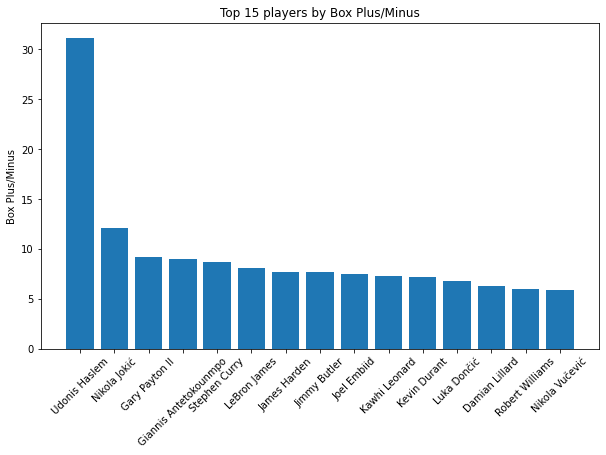

In [95]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['BPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus')
plt.bar(x, y)
plt.ylabel('Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

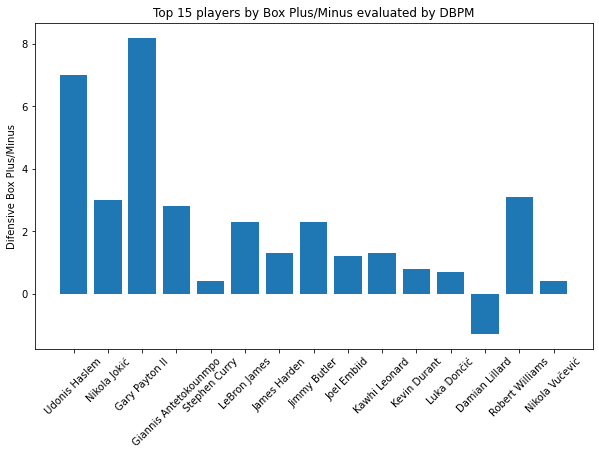

In [96]:
x = players_by_most_BPM[:15].index
y = players_by_most_BPM[:15]['DBPM']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Box Plus/Minus evaluated by DBPM')
plt.bar(x, y)
plt.ylabel('Difensive Box Plus/Minus')
plt.xticks(rotation=45)
plt.show()

In [97]:
a = players_by_most_BPM['BPM']['Stephen Curry']
b = players_by_most_BPM['BPM']['LeBron James']
c = players_by_most_BPM['BPM']['Lonzo Ball']
d = players_by_most_BPM['BPM']['Seth Curry']
e = players_by_most_BPM['BPM']['DeMar DeRozan']
[a, b, c, d, e]

[8.7, 8.1, 1.7, -0.3, 3.1]

In [98]:
players_by_most_BPM['BPM']['James Harden']

Player
James Harden    7.7
James Harden    5.0
Name: BPM, dtype: float64

In [99]:
players_by_most_VORP = Adv_Stats_1.sort_values(by='VORP', ascending=False)[['Player', 'VORP', 'BPM', 'OBPM', 'DBPM']]
players_by_most_VORP.set_index('Player', inplace=True)
players_by_most_VORP

,VORP,BPM,OBPM,DBPM
Player,,,,
Nikola Jokić,8.8,12.1,9.1,3.0
Stephen Curry,5.8,8.7,8.3,0.4
Giannis Antetokounmpo,5.6,9.0,6.2,2.8
Luka Dončić,5.1,6.8,6.1,0.7
Damian Lillard,5.0,6.3,7.5,-1.3
...,...,...,...,...
Darius Bazley,-1.0,-4.4,-3.1,-1.3
Aleksej Pokusevski,-1.1,-6.1,-5.1,-1.0
Théo Maledon,-1.3,-5.0,-4.0,-1.0


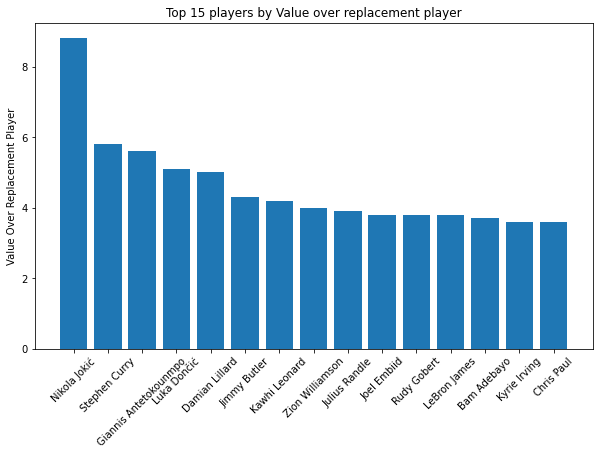

In [100]:
x = players_by_most_VORP[:15].index
y = players_by_most_VORP[:15]['VORP']
plt.figure(figsize=(10,6))
plt.title('Top 15 players by Value over replacement player')
plt.bar(x, y)
plt.ylabel('Value Over Replacement Player')
plt.xticks(rotation=45)
plt.show()

In [101]:
#fare medie divise per ruolo per WS e BPM 
# Adv_Stats_1['BPM'] oppure Adv_Stats_1['WS'] poi fare distribuzione tenendo conto dei ruoli
#da fare anche per stats per game

## Per Game Stats

In [102]:
data = pd.read_html("https://www.basketball-reference.com/leagues/NBA_2021_per_game.html")
df = pd.DataFrame(data[0])
xG_Stats = df.where(df["Player"] != "Player").dropna()

In [103]:
xG_Stats_1 = xG_Stats.where(xG_Stats["Tm"] != "TOT").dropna(how='all', axis=0)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 730
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      571 non-null    object
 1   Player  571 non-null    object
 2   Pos     571 non-null    object
 3   Age     571 non-null    object
 4   Tm      571 non-null    object
 5   G       571 non-null    object
 6   GS      571 non-null    object
 7   MP      571 non-null    object
 8   FG      571 non-null    object
 9   FGA     571 non-null    object
 10  FG%     571 non-null    object
 11  3P      571 non-null    object
 12  3PA     571 non-null    object
 13  3P%     571 non-null    object
 14  2P      571 non-null    object
 15  2PA     571 non-null    object
 16  2P%     571 non-null    object
 17  eFG%    571 non-null    object
 18  FT      571 non-null    object
 19  FTA     571 non-null    object
 20  FT%     571 non-null    object
 21  ORB     571 non-null    object
 22  DRB     571 non-null    ob

In [104]:
xG_Stats_1.drop('Rk', axis=1, inplace=True)

In [105]:
for el in xG_Stats_1:
  if(el != "Player" and el != "Pos"  and el != "Tm"):
    xG_Stats_1[el] = pd.to_numeric(xG_Stats_1[el])

In [106]:
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  571 non-null    object 
 1   Pos     571 non-null    object 
 2   Age     571 non-null    int64  
 3   Tm      571 non-null    object 
 4   G       571 non-null    int64  
 5   GS      571 non-null    int64  
 6   MP      571 non-null    float64
 7   FG      571 non-null    float64
 8   FGA     571 non-null    float64
 9   FG%     571 non-null    float64
 10  3P      571 non-null    float64
 11  3PA     571 non-null    float64
 12  3P%     571 non-null    float64
 13  2P      571 non-null    float64
 14  2PA     571 non-null    float64
 15  2P%     571 non-null    float64
 16  eFG%    571 non-null    float64
 17  FT      571 non-null    float64
 18  FTA     571 non-null    float64
 19  FT%     571 non-null    float64
 20  ORB     571 non-null    float64
 21  DRB     571 non-null    float64
 22  TR

In [107]:
xG_Stats_1.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,25.833625,39.224168,18.509632,20.522767,3.400000,7.456918,0.446581,1.059019,2.966725,0.318813,...,0.754107,0.805954,2.892644,3.697898,2.092469,0.648511,0.413485,1.131699,1.683187,9.276182
std,4.142038,20.885036,22.341005,8.904399,2.300869,4.746208,0.088047,0.889235,2.235702,0.123474,...,0.148470,0.687048,1.779705,2.302263,1.865512,0.390021,0.394982,0.822380,0.732981,6.353084
min,19.000000,1.000000,0.000000,2.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000
25%,23.000000,21.000000,1.000000,13.650000,1.600000,3.800000,0.402500,0.300000,1.200000,0.278000,...,0.690000,0.300000,1.600000,2.000000,0.800000,0.350000,0.100000,0.600000,1.100000,4.600000
50%,25.000000,40.000000,7.000000,20.400000,2.900000,6.400000,0.441000,0.900000,2.500000,0.343000,...,0.778000,0.600000,2.600000,3.300000,1.500000,0.600000,0.300000,0.900000,1.700000,7.700000
75%,29.000000,58.000000,32.000000,27.950000,4.600000,9.950000,0.491000,1.700000,4.400000,0.389500,...,0.846000,1.050000,3.800000,4.800000,2.800000,0.900000,0.600000,1.500000,2.100000,12.450000
max,38.000000,72.000000,72.000000,37.600000,11.200000,23.000000,0.769000,5.300000,12.700000,1.000000,...,1.000000,4.100000,10.100000,13.500000,11.700000,2.100000,3.400000,4.800000,4.000000,32.000000


In [108]:
#fillna con le percentuali = 0 quindi aggiungere 0 dove manca
xG_Stats_1['FG%'].fillna(0, inplace=True)
xG_Stats_1['3P%'].fillna(0, inplace=True)
xG_Stats_1['2P%'].fillna(0, inplace=True)
xG_Stats_1['eFG%'].fillna(0, inplace=True)
xG_Stats_1['FT%'].fillna(0, inplace=True)
xG_Stats_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 0 to 730
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  571 non-null    object 
 1   Pos     571 non-null    object 
 2   Age     571 non-null    int64  
 3   Tm      571 non-null    object 
 4   G       571 non-null    int64  
 5   GS      571 non-null    int64  
 6   MP      571 non-null    float64
 7   FG      571 non-null    float64
 8   FGA     571 non-null    float64
 9   FG%     571 non-null    float64
 10  3P      571 non-null    float64
 11  3PA     571 non-null    float64
 12  3P%     571 non-null    float64
 13  2P      571 non-null    float64
 14  2PA     571 non-null    float64
 15  2P%     571 non-null    float64
 16  eFG%    571 non-null    float64
 17  FT      571 non-null    float64
 18  FTA     571 non-null    float64
 19  FT%     571 non-null    float64
 20  ORB     571 non-null    float64
 21  DRB     571 non-null    float64
 22  TR

In [109]:
#rimuovere qualche variabile sulla quale non fare nessuna task, ad esempio PF, eFG% ecc.

In [110]:
xG_Stats_1.to_csv('xG_Stats_1.csv', index=False)

In [111]:
#fare plot con una variabile e tutti i giocatori per vedere le varie similutidini ecc

In [112]:
#eliminare le rows con nomi variabili da dentro la tabella

<AxesSubplot:>

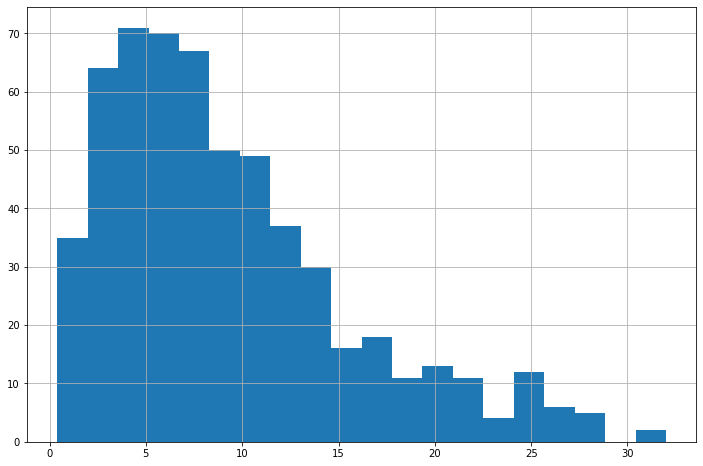

In [113]:
xG_Stats_1['PTS'].hist(bins=20, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>],
       [<AxesSubplot:title={'center':'TRB'}>,
        <AxesSubplot:title={'center':'MP'}>],
       [<AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'STL'}>]], dtype=object)

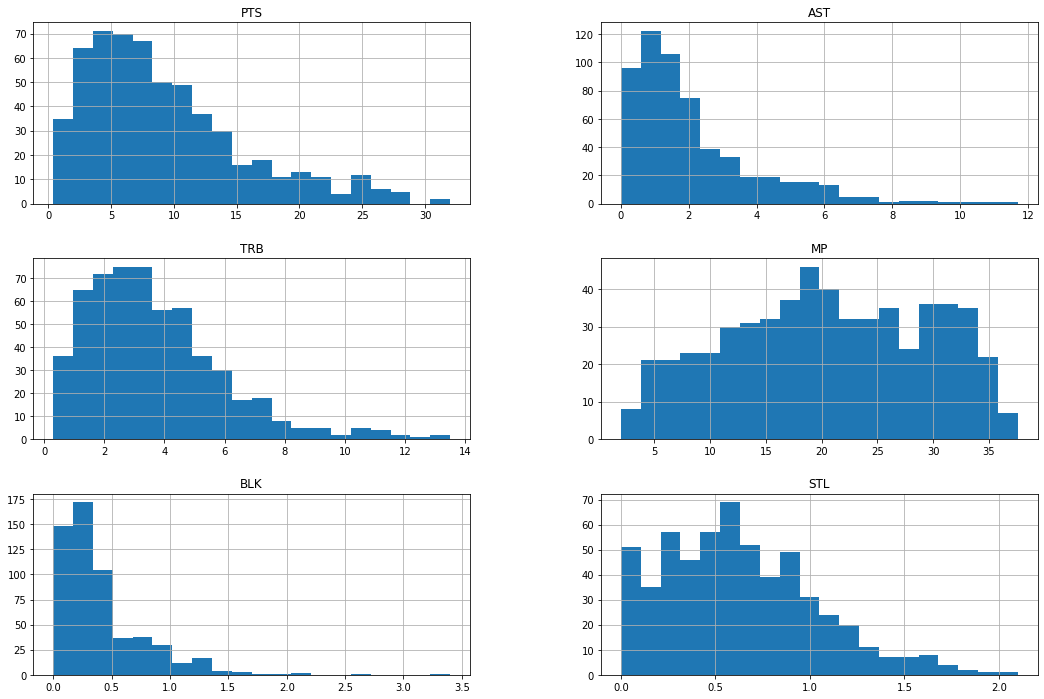

In [114]:
xG_Stats_1[['PTS', 'AST', 'TRB', 'MP', 'BLK', 'STL']].hist(bins=20, figsize=(18,12))

In [115]:
#giocatore con media punti/assist/rimbalzi/stoppate ecc più alta
a = xG_Stats_1['PTS'].max()
b = xG_Stats_1['AST'].max()
c = xG_Stats_1['TRB'].max()
d = xG_Stats_1['STL'].max()
e = xG_Stats_1['TOV'].max()
f = xG_Stats_1['BLK'].max()
[a,b,c,d,e,f]

[32.0, 11.7, 13.5, 2.1, 4.8, 3.4]

In [116]:
a = xG_Stats_1['PTS'].mean()
b = xG_Stats_1['AST'].mean()
c = xG_Stats_1['TRB'].mean()
d = xG_Stats_1['STL'].mean()
e = xG_Stats_1['TOV'].mean()
f = xG_Stats_1['BLK'].mean()
[a,b,c,d,e,f]

[9.276182136602452,
 2.0924693520140107,
 3.6978984238178634,
 0.6485113835376533,
 1.1316987740805604,
 0.41348511383537656]

In [117]:
a = xG_Stats_1['PTS'].min()
b = xG_Stats_1['AST'].min()
c = xG_Stats_1['TRB'].min()
d = xG_Stats_1['STL'].min()
e = xG_Stats_1['TOV'].min()
f = xG_Stats_1['BLK'].min()
[a,b,c,d,e,f]

[0.4, 0.0, 0.3, 0.0, 0.0, 0.0]

In [118]:
#liste per variabili varie
PTS = list(xG_Stats_1['PTS'])

In [119]:
#xG_Stats_1[xG_Stats_1['PTS'].max()]

In [120]:
players_by_most_games = xG_Stats_1.sort_values(by='GS', ascending=False)[['Player', 'G', 'GS', 'PTS']]
players_by_most_games.set_index('Player', inplace=True)
players_by_most_games

,G,GS,PTS
Player,,,
Bojan Bogdanović,72,72,17.0
Nikola Jokić,72,72,26.4
Mikal Bridges,72,72,13.5
Duncan Robinson,72,72,13.1
RJ Barrett,72,72,17.6
...,...,...,...
Alfonzo McKinnie,39,0,3.1
Anfernee Simons,64,0,7.8
Tim Frazier,5,0,1.6


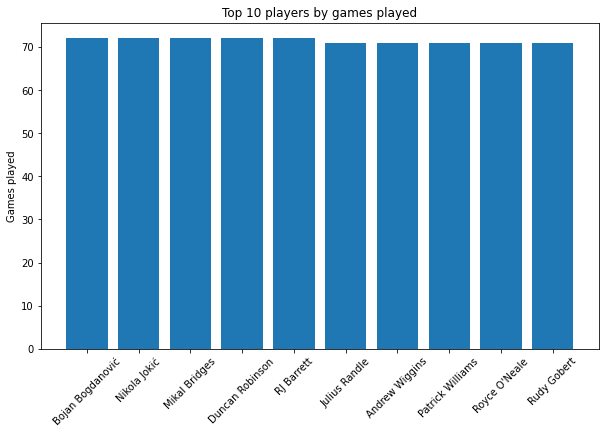

In [121]:
x = players_by_most_games[:10].index
y = players_by_most_games[:10]['GS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by games played')
plt.bar(x, y)
plt.ylabel('Games played')
plt.xticks(rotation=45)
plt.show()

In [122]:
players_by_most_games['GS']['Mikal Bridges']

72

In [123]:
players_by_most_points = xG_Stats_1.sort_values(by='PTS', ascending=False)[['Player', 'PTS', 'AST', 'TRB']]
players_by_most_points.set_index('Player', inplace=True)
players_by_most_points

,PTS,AST,TRB
Player,,,
Stephen Curry,32.0,5.8,5.5
Bradley Beal,31.3,4.4,4.7
Damian Lillard,28.8,7.5,4.2
Joel Embiid,28.5,2.8,10.6
Giannis Antetokounmpo,28.1,5.9,11.0
...,...,...,...
Nick Richards,0.8,0.1,0.6
Vincent Poirier,0.8,0.2,1.4
Ty-Shon Alexander,0.6,0.4,0.7


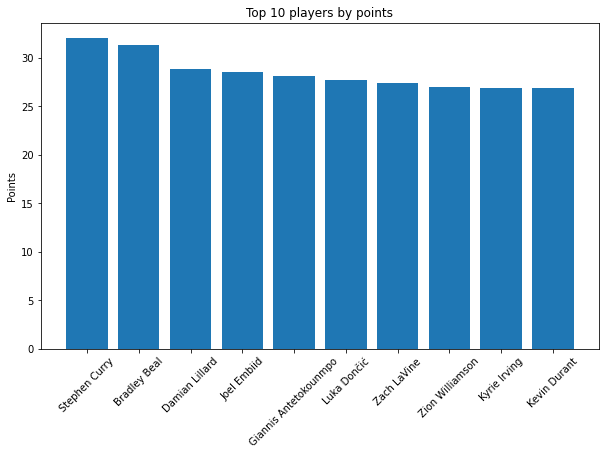

In [124]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['PTS']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points')
plt.bar(x, y)
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.show()

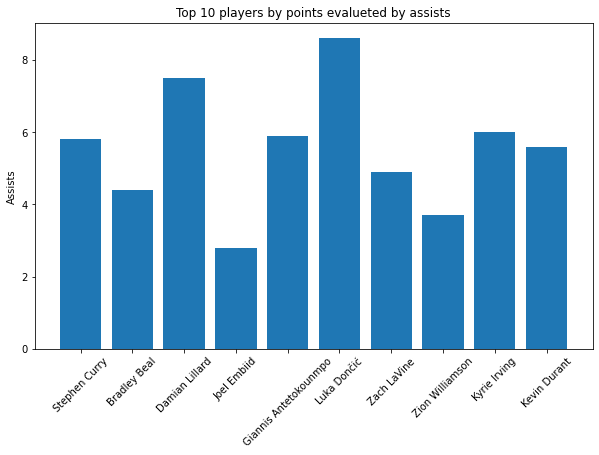

In [125]:
x = players_by_most_points[:10].index
y = players_by_most_points[:10]['AST']
plt.figure(figsize=(10,6))
plt.title('Top 10 players by points evalueted by assists')
plt.bar(x, y)
plt.ylabel('Assists')
plt.xticks(rotation=45)
plt.show()

In [126]:
a = players_by_most_points['PTS']['Stephen Curry']
b = players_by_most_points['PTS']['LeBron James']
c = players_by_most_points['PTS']['Nikola Jokić']
d = players_by_most_points['PTS']['Giannis Antetokounmpo']
e = players_by_most_points['PTS']['John Wall']
[a, b, c, d, e]

[32.0, 25.0, 26.4, 28.1, 20.6]

In [127]:
xG_players_groupby = xG_Stats_1.groupby('Player')

In [128]:
xG_players_groupby_sum = xG_players_groupby.sum()

In [129]:
a = xG_players_groupby_sum['PTS'].loc['LeBron James']
b = xG_players_groupby_sum['PTS'].loc['Stephen Curry']
[a, b]

[25.0, 32.0]